In [1]:
######################
# import pacakge
######################
#import datetime as datetime
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
%matplotlib ipympl
#%matplotlib widget
import numpy as np

In [2]:
##########################
#folder definition
##########################
caenlogfolder = '/mnt/c/Users/xenon/Documents/' 

In [121]:
#fcaen = caenlogfolder + 'CAENGECO2020_20230707_20230809.log'
fcaen = caenlogfolder + 'CAENGECO2020.log'

In [4]:
def read_line(line, param_dict=None):
    line_s = line.split(' ')
    dateascii = line_s[0][1:-2]
    date = datetime.strptime(dateascii,'%Y-%m-%dT%H:%M:%S')
    measurement_name = line_s[1][1:-1]
    channel = int(line_s[5][1:-1])
    param = line_s[7][1:-1]
    param_val = line_s[9][1:-2]
    if (param == "Pw" or param == 'ImonRange'):
        if param_val == 'true':
            param_val = 1
        else:
            param_val = 0
    else:
        param_val = float(param_val)
    return [date, channel, param, param_val]

In [43]:
now = datetime.now()
def get_HV_df(filename):
    param_dict_0 = {"date":[now], "channel":[0],"IMon":[0], "VMon":[0],"Pw":[0],"ChStatus":[0],"IMonRange":[0]}
    param_dict_2 = {"date":[now], "channel":[2],"IMon":[0], "VMon":[0],"Pw":[0],"ChStatus":[0],"IMonRange":[0]}
    with open(filename, 'r') as f:
            lines = f.readlines()
            df = pd.DataFrame()
            for l in lines:
                [date, channel, param, param_val] = read_line(l)
                if date == 0:
                    print(date)
                if channel == 0:
                    for p in param_dict_0:
                        if p == param:
                            param_dict_0[p].append(param_val)
                            param_dict_2[p].append(param_dict_2[p][-1])
                        elif p == 'date':
                            param_dict_0["date"].append(date)
                            param_dict_2["date"].append(date)
                        elif p == 'channel':
                            param_dict_0["channel"].append(0)
                            param_dict_2["channel"].append(2)
                        else:
                           param_dict_0[p].append(param_dict_0[p][-1])
                           param_dict_2[p].append(param_dict_2[p][-1])
                elif channel == 2:
                    for p in param_dict_2:
                        if p == param:
                            param_dict_2[p].append(param_val)
                            param_dict_0[p].append(param_dict_0[p][-1])
                        elif p == 'date':
                            param_dict_0["date"].append(date)
                            param_dict_2["date"].append(date)
                        elif p == 'channel':
                            param_dict_0["channel"].append(0)
                            param_dict_2["channel"].append(2)
                        else:
                           param_dict_0[p].append(param_dict_0[p][-1])
                           param_dict_2[p].append(param_dict_2[p][-1])
                    
            print(param_dict_0)
            print(param_dict_2)
                
    df_0 = pd.DataFrame.from_dict(param_dict_0)
    df_2 = pd.DataFrame.from_dict(param_dict_2)
    df = df_0
    df= pd.concat([df,df_2], ignore_index=True)
    return df

In [44]:
# d1 = datetime(2023, 7, 21, 14, 0, 0)
# d2 = datetime(2023, 7, 21, 17, 0, 0)

def filter_date(df,d1,d2):
    mask = (df['date'] > d1) & (df['date'] <=d2)
    df_f = df.loc[mask]
    return df_f
    

In [125]:
df = get_HV_df(fcaen)

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [126]:
d1 = datetime(2023, 8, 24, 17, 0, 0)
d2 = datetime(2023, 8, 24, 23, 30, 0)
df_f = filter_date(df,d1,d2)

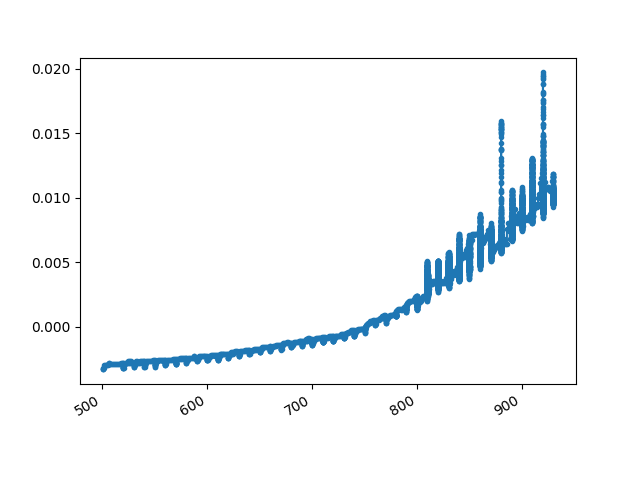

In [134]:
#%matplotlib notebook
df_0 = df_f.query("channel==0")
df_2 = df_f.query("channel==2")
fig = plt.figure()
#plt.plot_date(df_0.date[1:], df_0.VMon[1:],'.-')
#plt.plot_date(df_2.date[1:], df_2.VMon[1:],'.-')
#plt.plot_date(df_0.date[1:], df_0.IMon[1:]*1000,'.-')
#plt.plot_date(df_0.date[1:], df_2.IMon[1:]*1000,'.-')

#plt.plot(df_2.VMon[1:], np.log10(df_2.IMon[1:] - np.min(df_2.IMon[1:])),'.-')
plt.plot(df_2.VMon[1:], df_2.IMon[1:] ,'.-')
#plt.plot(df_2.VMon[1:], df_0.IMon[1:],'.-')
plt.gcf().autofmt_xdate()
plt.show()


In [96]:
plt.close(fig)

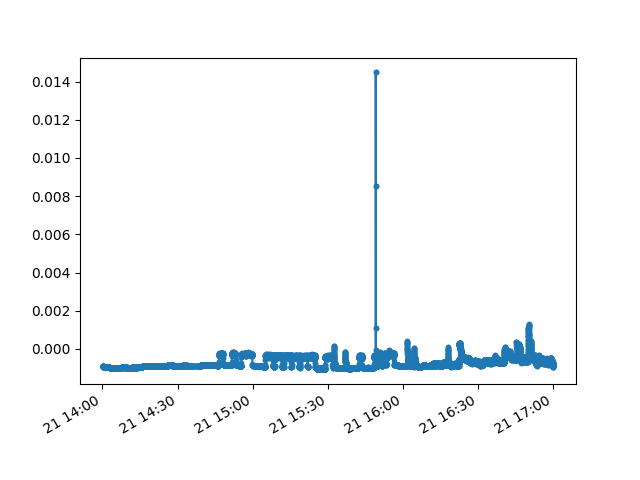

In [50]:
def correct_imon0(vmon_array, imon_array, vbase, correction):
    ''' vmon_array: in V
    imon_
    return imon_array - (vmon_array - vbase)

In [51]:
plt.close(fig)

<IPython.core.display.Javascript object>


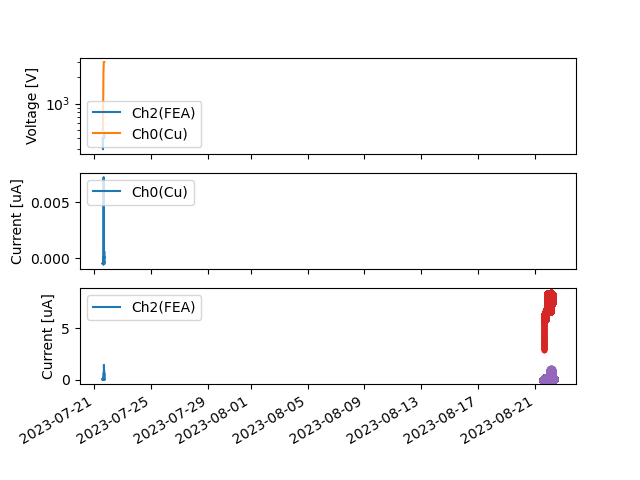

In [14]:
fig, axs = plt.subplots(3, 1, sharex=True)
ch0scale = 1
#plot_date(df_2.date[1:], df_2.ChStatus[1:],'--')
#plot_date(df_2.date[1:], df_2.ChStatus[1:],'--')
#axs[0].plot(df_2.date[1:], df_0.VMon[1:])
imon0 = df_0.IMon[1:]*ch0scale
#offset0 = np.min(imon0)
offset0 = 0
#offset2 = np.min(imon2)
offset2 = 0

imon0_offset = imon0 - offset0 
imon2 = df_2.IMon[1:]*ch0scale
imon2_offset = imon2 - offset2 

axs[0].semilogy(df_2.date[1:], df_2.VMon[1:],label='Ch2(FEA)')
axs[0].semilogy(df_0.date[1:], df_0.VMon[1:],label='Ch0(Cu)')
axs[0].legend(loc="lower left")
axs[0].set_ylabel('Voltage [V]')
#axs[1].plot(df_2.date[1:], imon0)
#axs[1].plot(df_2.date[1:], np.abs(df_0.IMon[1:]*1000))
#axs[1].semilogy(df_2.date[1:], imon0_offset)
#axs[2].semilogy(df_2.date[1:], imon2_offset)
#axs[1].semilogy(df_2.date[1:], imon0_offset,label='Ch0(Cu)')
axs[1].plot(df_2.date[1:], imon0_offset,label='Ch0(Cu)')
axs[1].set_ylabel('Current [uA]')
axs[1].legend(loc="upper left")
#axs[2].semilogy(df_2.date[1:], imon2_offset,label='Ch2(FEA)')
axs[2].plot(df_2.date[1:], imon2_offset,label='Ch2(FEA)')
axs[2].legend(loc="upper left")
axs[2].set_ylabel('Current [uA]')

#plt.legend()
#axs[1].plot(df_2.date[1:], np.abs(df_0.IMon[1:]*1000))
#axs[2].plot(df_2.date[1:], np.abs(df_2.IMon[1:]))
fig.autofmt_xdate()

<IPython.core.display.Javascript object>


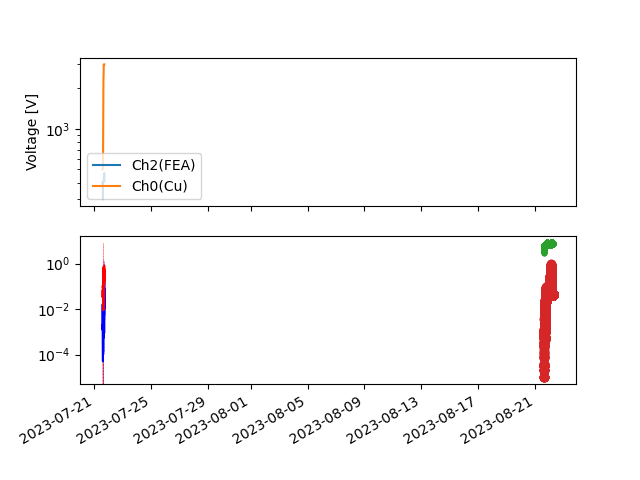

In [15]:
fig, axs = plt.subplots(2, 1, sharex=True)
ch0scale = 1000
imon0 = df_0.IMon[1:]*ch0scale
offset0 = np.min(imon0)
#offset0 = 0
offset2 = np.min(imon2)
#offset2 = 0

imon0_offset = imon0 - offset0 
imon2 = df_2.IMon[1:]
imon2_offset = imon2 - offset2 
dates =  df_2.date[1:]

axs[0].semilogy(df_2.date[1:], df_2.VMon[1:],label='Ch2(FEA)')
axs[0].semilogy(df_0.date[1:], df_0.VMon[1:],label='Ch0(Cu)')
axs[0].legend(loc="lower left")
axs[0].set_ylabel('Voltage [V]')
#axs[1].plot(df_2.date[1:], imon0)
#axs[1].plot(df_2.date[1:], np.abs(df_0.IMon[1:]*1000))
#axs[1].semilogy(df_2.date[1:], imon0_offset)
#axs[2].semilogy(df_2.date[1:], imon2_offset)
#axs[1].semilogy(df_2.date[1:], imon0_offset,label='Ch0(Cu)')

axs[1].semilogy(df_2.date[1:], imon2_offset,'b--',linewidth=0.2,label='Ch2(FEA)')
axs[1].semilogy(df_2.date[1:], imon0_offset,'r--',linewidth=0.2,label='Ch0(Cu)')

test = imon2_offset

window = 100
w_imon2 = np.lib.stride_tricks.sliding_window_view(test,window)
w_imon2 = np.mean(w_imon2,axis=1)
w_imon0 = np.lib.stride_tricks.sliding_window_view(imon0_offset,window)
w_imon0 = np.mean(w_imon0,axis=1)

#print(np.mean(w_imon2,axis=1))
#print(dates[::window])

axs[1].semilogy(dates[:-99],w_imon2,'b', label='Ch2(FEA)')
axs[1].semilogy(dates[:-99],w_imon0,'r',label='Ch0(Cu)')

#axs[1].semilogy(dates[::window], imon0_offset,label='Ch0(Cu)')
#np.lib.stride_tricks.sliding_window_view

# axs[1].set_ylabel('Current [uA]')
# axs[1].legend(loc="upper left")
# #axs[2].semilogy(df_2.date[1:], imon2_offset,label='Ch2(FEA)')
# axs[2].legend(loc="upper left")
# axs[2].set_ylabel('Current [uA]')

#plt.legend()
#axs[1].plot(df_2.date[1:], np.abs(df_0.IMon[1:]*1000))
#axs[2].plot(df_2.date[1:], np.abs(df_2.IMon[1:]))
fig.autofmt_xdate()

### new data

In [16]:
fcaen = 'CAENGECO2020.log'

In [17]:
now = datetime.now()
param_dict_0 = {"date":[now], "channel":[0],"IMon":[0], "VMon":[0],"Pw":[0],"ChStatus":[0],"IMonRange":[0]}
param_dict_2 = {"date":[now], "channel":[2],"IMon":[0], "VMon":[0],"Pw":[0],"ChStatus":[0],"IMonRange":[0]}
with open(fcaen, 'r') as f:
        lines = f.readlines()
        df = pd.DataFrame()
        for l in lines:
#            prev_dict = param_dict
            [date, channel, param, param_val] = read_line(l)
            if date == 0:
                print(date)
#            print([date, channel, param, param_val] )
            if channel == 0:
                for p in param_dict_0:
                    if p == param:
                        param_dict_0[p].append(param_val)
                        param_dict_2[p].append(param_dict_2[p][-1])
                    elif p == 'date':
                        param_dict_0["date"].append(date)
                        param_dict_2["date"].append(date)
                    elif p == 'channel':
                        param_dict_0["channel"].append(0)
                        param_dict_2["channel"].append(2)
                    else:
                       param_dict_0[p].append(param_dict_0[p][-1])
                       param_dict_2[p].append(param_dict_2[p][-1])
            elif channel == 2:
                for p in param_dict_2:
                    if p == param:
                        param_dict_2[p].append(param_val)
                        param_dict_0[p].append(param_dict_0[p][-1])
                    elif p == 'date':
                        param_dict_0["date"].append(date)
                        param_dict_2["date"].append(date)
                    elif p == 'channel':
                        param_dict_0["channel"].append(0)
                        param_dict_2["channel"].append(2)
                    else:
                       param_dict_0[p].append(param_dict_0[p][-1])
                       param_dict_2[p].append(param_dict_2[p][-1])
                
        print(param_dict_0)
        print(param_dict_2)
            
df_0 = pd.DataFrame.from_dict(param_dict_0)
df_2 = pd.DataFrame.from_dict(param_dict_2)
df = df_0
df = df.append(df_2)
df = df[100:]

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

/tmp/ipykernel_882/1428494143.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_2)


In [20]:
df
#df = df[1:]
#df.loc['2023']
#print(df['date'])
#df.loc['2023-07-23']
#print(type(df['time']))
d1 = datetime(2023, 8, 21, 14, 0, 0)
d2 = datetime(2023, 8, 22, 7, 0, 0)
print(type(df['date']))
mask = (df['date'] > d1) & (df['date'] <=d2)

# print(d1)
# df_t = df[(df['time'] > '2023-07-23') & (df['time'] < '2023-07-24')]

#           #df.time.between('15--2023','21-sep-2022')
df_f = df.loc[mask]
# #df.loc['2023-7-23':'2023-7-24']
# #df_t = df.query("time > d1 & time < d2")

# #print(df_t)

<class 'pandas.core.series.Series'>


                     date  channel     IMon    VMon  Pw  ChStatus  IMonRange
100   2023-08-21 14:37:48        0  0.00285   44.10   0       3.0          0
101   2023-08-21 14:37:48        0  0.00293   44.10   0       3.0          0
102   2023-08-21 14:37:49        0  0.00293   45.05   0       3.0          0
103   2023-08-21 14:37:49        0  0.00299   45.05   0       3.0          0
104   2023-08-21 14:37:49        0  0.00299   45.05   0       3.0          0
...                   ...      ...      ...     ...  ..       ...        ...
54244 2023-08-22 06:59:49        2  0.04488  600.35   1       1.0          0
54245 2023-08-22 06:59:50        2  0.04487  600.35   1       1.0          0
54246 2023-08-22 06:59:53        2  0.04486  600.35   1       1.0          0
54247 2023-08-22 06:59:54        2  0.04485  600.35   1       1.0          0
54248 2023-08-22 07:00:00        2  0.04484  600.35   1       1.0          0

[108398 rows x 7 columns]


<IPython.core.display.Javascript object>


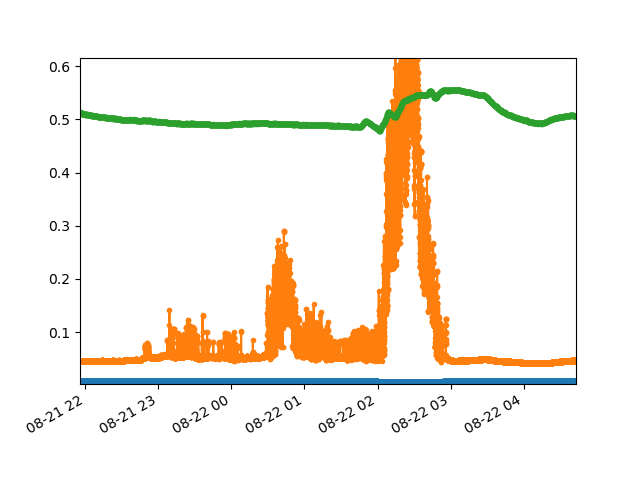

In [118]:
print(df_f)
df_0 = df_f.query("channel==0")
df_2 = df_f.query("channel==2")
plt.plot_date(df_0.date[1:], df_0.IMon[1:],'.-')
plt.plot_date(df_2.date[1:], df_2.IMon[1:], '.-')
plt.plot_date(env_df.datetime[::1], env_df.humidity[::1]/100,'.-')
plt.gcf().autofmt_xdate()

In [28]:
envfile = 'AD-1687_T1203199.csv'

In [98]:
env_df = pd.read_csv(envfile,index_col=0,skiprows=1, usecols=[0,1,2,3,4,5,6,7,8,9,10] , names=['iter','date','time','temp','temp_unit','humidity','humidity_unit', 'pressure', 'pressure_unit','vibration', 'vibration_unit'])

In [105]:
env_df['datetime'] = pd.to_datetime(env_df['date'] + ' ' + env_df['time'])


In [106]:
env_df.datetime

iter
1      2023-08-08 13:10:58
2      2023-08-08 13:11:13
3      2023-08-08 13:11:16
4      2023-08-08 13:11:31
5      2023-08-08 13:11:46
               ...        
5930   2023-08-22 08:56:34
5931   2023-08-22 08:56:44
5932   2023-08-22 08:56:54
5933   2023-08-22 08:57:04
5934   2023-08-22 08:57:14
Name: datetime, Length: 5934, dtype: datetime64[ns]

<IPython.core.display.Javascript object>


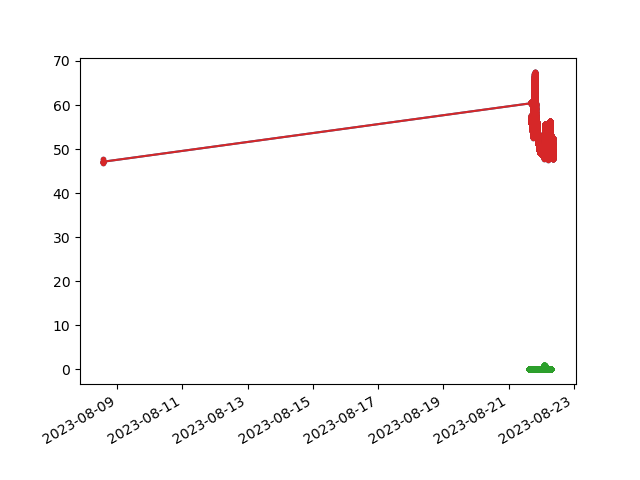

In [115]:
#env_df.time.values
plt.plot_date(env_df.datetime[::1], env_df.humidity[::1],'.-')
plt.gcf().autofmt_xdate()
